In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import missingno as msno

In [2]:
Google_Search=pd.read_csv("google_search_data.csv")
Product_Manufacturer=pd.read_csv("product_manufacturer_list.csv")
Sales=pd.read_csv("sales_data.csv")
Social_Media=pd.read_excel("social_media_data.xlsx")
Theme=pd.read_csv("Theme_list.csv")
Theme_product_list=pd.read_csv("Theme_product_list.csv")

## PREPROCESSING

In [3]:
Google_Search.rename(columns = {'Claim_ID':'CLAIM_ID'}, inplace = True)
Google_Search['date']=pd.to_datetime(Google_Search['date'])
Google_Search.head()

,date,platform,searchVolume,CLAIM_ID,week_number,year_new
0,2014-05-01,google,349,916,1,2014
1,2014-06-01,google,349,916,2,2014
2,2014-07-01,google,697,916,2,2014
3,2014-10-01,google,349,916,2,2014
4,2014-01-20,google,697,916,4,2014


In [4]:
Product_Manufacturer=Product_Manufacturer[['PRODUCT_ID','Vendor']]
Product_Manufacturer.head()

,PRODUCT_ID,Vendor
0,1,Others
1,2,Others
2,3,Others
3,4,Others
4,5,Others


In [5]:
Sales['system_calendar_key_N'] = pd.to_datetime(Sales['system_calendar_key_N'], format='%Y%m%d')
Sales.rename(columns = {'product_id':'PRODUCT_ID'}, inplace = True)
Sales.head()

,system_calendar_key_N,PRODUCT_ID,sales_dollars_value,sales_units_value,sales_lbs_value
0,2016-01-09,1,13927.0,934,18680
1,2016-01-09,3,10289.0,1592,28646
2,2016-01-09,4,357.0,22,440
3,2016-01-09,6,23113.0,2027,81088
4,2016-01-09,7,23177.0,3231,58164


In [6]:
Social_Media.rename(columns = {'Theme Id':'CLAIM_ID'}, inplace = True)
Social_Media['published_date']=pd.to_datetime(Social_Media['published_date'])
Social_Media.head()

,CLAIM_ID,published_date,total_post
0,148.0,2015-01-10,76
1,148.0,2015-10-10,31
2,148.0,2015-11-10,65
3,148.0,2015-12-10,88
4,148.0,2015-10-13,85


In [7]:
Theme.head()

,CLAIM_ID,Claim Name
0,0,No Claim
1,8,low carb
2,15,beans
3,16,cocoa
4,26,vanilla


In [8]:
Theme_product_list.head()

,PRODUCT_ID,CLAIM_ID
0,26,8
1,29,8
2,48,81
3,50,81
4,74,227


## Provide the list of themes available across all data sources

In [9]:
Theme['Claim Name'].unique()

array(['No Claim', 'low carb', 'beans', 'cocoa', 'vanilla', 'stroganoff',
       'cumin', 'high/source of protein', 'no additives/preservatives',
       'buckwheat', 'tutti frutti', 'ethical - not specific', 'brown ale',
       'french bisque', 'pheasant', 'whitebait', 'gmo free',
       'low calorie', 'peach', 'crab', 'nuts', 'venison', 'fruit',
       'convenience - easy-to-prepare', 'anchovy', 'pomegranate',
       'scallop', 'american gumbo', 'tuna', 'low sodium', 'low sugar',
       'french', 'chicken', 'ethical - packaging', 'cherry',
       'vitamin/mineral fortified', 'liver', 'red raspberry', 'cookie',
       'pollock', 'blueberry', 'bone health', 'prebiotic', 'poultry',
       'cheddar cheese', 'energy/alertness', 'halal', 'herbs', 'pizza',
       'american southwest style', 'salmon', 'beef hamburger', 'tilapia',
       'mackerel', 'peanut', 'lobster', 'sea salt', 'soy foods',
       'apple cinnamon', 'gingerbread', 'vegetarian', 'ethnic & exotic',
       'cream', 'berry', 'g

In [10]:
Theme['Claim Name'].nunique()

208

In [11]:
Google_Search['CLAIM_ID'].nunique()

160

In [12]:
Social_Media['CLAIM_ID'].nunique()

193

In [13]:
Sales_df=pd.merge(Sales,Theme_product_list,on='PRODUCT_ID',how='left')
sales_df1=pd.merge(Sales_df,Theme,on='CLAIM_ID',how='left')

In [14]:
sales_df1['CLAIM_ID'].nunique()

49

In [15]:
## UNIQUE THEMES
## TOTAL - 208
## GOOGLE SEARCH - 160
## SOCIAL MEDIA - 49

## Understands consumer preference(themes) available in each data source

<AxesSubplot:ylabel='Claim Name'>

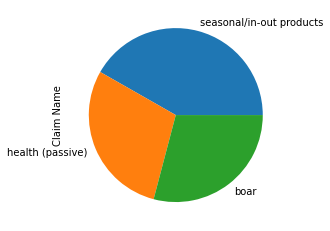

In [16]:
n = 3
df1=pd.merge(Google_Search,Theme,on='CLAIM_ID',how='left')
df1['Claim Name'].value_counts().head(3).plot(kind='pie')
#for i in t:
    #print(Theme[Theme['CLAIM_ID']==i])


In [17]:
###Most preferred 3 themes in Google Search data
#seasonal/in-out products , health (passive) , boar

<AxesSubplot:ylabel='Claim Name'>

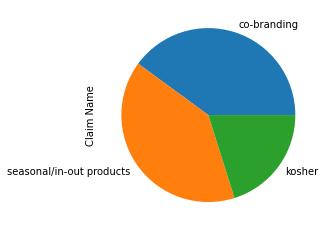

In [18]:
m = 3
df2=pd.merge(Social_Media,Theme,on='CLAIM_ID',how='left')
df2['Claim Name'].value_counts().head(3).plot(kind='pie')

In [19]:
#Most preferred theme in Social Media Data
#co-branding , seasonal/in-out products , kosher

<AxesSubplot:ylabel='Claim Name'>

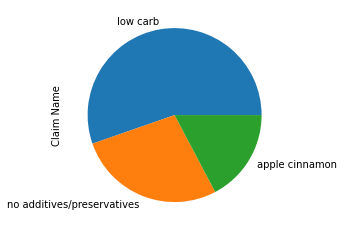

In [20]:
Sales_df=pd.merge(Sales,Theme_product_list,on='PRODUCT_ID',how='left')
sales_df1=pd.merge(Sales_df,Theme,on='CLAIM_ID',how='left')
sales_df1=sales_df1[sales_df1['CLAIM_ID']!=0]
m = 4
sales_df1['Claim Name'].value_counts().head(3).plot(kind='pie')

In [21]:
#Most preferred theme Sales Data
#low carb , no additives/preservatives, apple cinnamon

## Report for the sources

In [22]:
## Missing Values

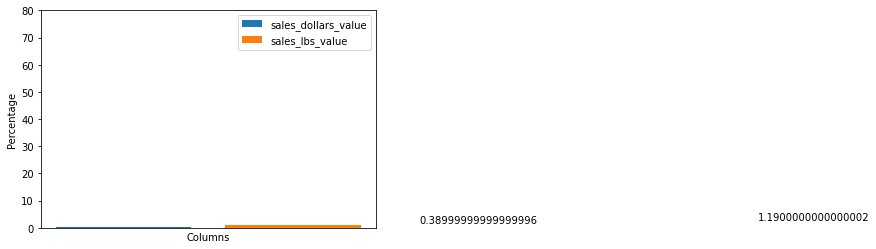

In [23]:
Sales=Sales.replace(0,np.nan)
per_1 = Sales.isna().mean().round(4) * 100
f, ax = plt.subplots()

for i,item in enumerate(zip(per_1.keys(),per_1.values)):
    if (item[1] > 0):
        ax.bar(item[0], item[1], label = item[0])
        ax.text(i - 0.25, item[1] + 1.5 , str(item[1]))

ax.set_xticklabels([]) 
ax.set_xticks([]) 
plt.ylim(0,80)
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.legend()
plt.show()

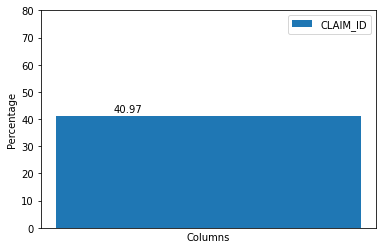

In [24]:
per_1 = Social_Media.isna().mean().round(4) * 100
f, ax = plt.subplots()

for i,item in enumerate(zip(per_1.keys(),per_1.values)):
    if (item[1] > 0):
        ax.bar(item[0], item[1], label = item[0])
        ax.text(i - 0.25, item[1] + 1.5 , str(item[1]))

ax.set_xticklabels([]) 
ax.set_xticks([]) 
plt.ylim(0,80)
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.legend()
plt.show()

<AxesSubplot:>

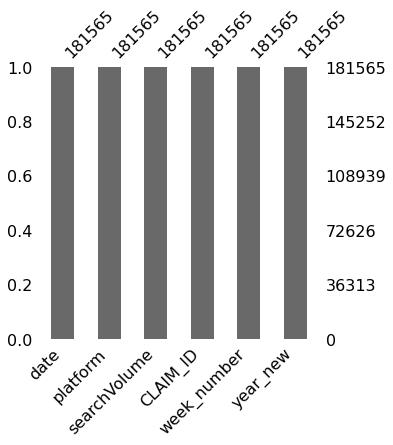

In [25]:
msno.bar(Google_Search,figsize=(5, 5))

In [26]:
#Sparcity

In [27]:
Sales=Sales.replace(np.nan,0)
Social_Media['CLAIM_ID']=Social_Media['CLAIM_ID'].replace(np.nan,0)

In [28]:
sparsity_social_media = sum((Social_Media == 0).astype(int).sum())/Social_Media.size
sparsity_sales = sum((Sales == 0).astype(int).sum())/Sales.size
sparsity_google_search = sum((Google_Search == 0).astype(int).sum())/Google_Search.size
sparsity_theme_list = sum((Theme_product_list == 0).astype(int).sum())/Theme_product_list.size
sparsity_prod_list = sum((Product_Manufacturer == 0).astype(int).sum())/Product_Manufacturer.size
sparsity_thems = sum((Theme == 0).astype(int).sum())/Theme.size
print("sparsity of social_media",sparsity_social_media)
print("sparsity of sales",sparsity_sales)
print("sparsity of Google search",sparsity_google_search)
print("sparsity of Theme product list",sparsity_theme_list)
print("sparsity of Product Manufacturer",sparsity_prod_list)
print("sparsity of Theme",sparsity_thems)
Social_Media['CLAIM_ID']=Social_Media['CLAIM_ID'].replace(0,np.nan)

sparsity of social_media 0.1911515651462032
sparsity of sales 0.0031541816038329878
sparsity of Google search 0.0
sparsity of Theme product list 0.1593266655735913
sparsity of Product Manufacturer 0.0
sparsity of Theme 0.002403846153846154


In [29]:
(Sales['sales_dollars_value'] == 0).sum()

17662

In [30]:
(Sales['sales_lbs_value'] == 0).sum()

53720

In [31]:
(Social_Media['total_post'] == 0).sum()

87364

In [32]:
## The above columns has zero values. It's less percentange in the total rows in Sales data. So we can drop that rows
## sales_dollars_value --> 17662
## sales_lbs_value --> 53720
## total_post --> 87364

In [33]:
Sales.drop(Sales.index[Sales['sales_dollars_value'] == 0], inplace = True)
Sales.drop(Sales.index[Sales['sales_lbs_value'] == 0], inplace = True)
Social_Media.drop(Social_Media.index[Social_Media['total_post'] == 0], inplace = True)
print((Sales['sales_dollars_value'] == 0).sum())
print((Sales['sales_lbs_value'] == 0).sum())
print((Social_Media['total_post'] == 0).sum())

0
0
0


In [34]:
##Duplicates

In [35]:
social_media_un=Social_Media[Social_Media.duplicated()]
sales_un=Sales[Sales.duplicated()]
google_search_un=Google_Search[Google_Search.duplicated()]
theme_list_un=Theme_product_list[Theme_product_list.duplicated()]
prod_list_un=Product_Manufacturer[Product_Manufacturer.duplicated()]
thems_un=Theme[Theme.duplicated()]

In [36]:
print("Duplicated rows in Social media:",social_media_un.shape[0])
print("Duplicated rows in Sales:",sales_un.shape[0])
print("Duplicated rows in Google Search:",google_search_un.shape[0])
print("Duplicated rows in Theme Product list:",theme_list_un.shape[0])
print("Duplicated rows in Product Manufactuer:",prod_list_un.shape[0])
print("Duplicated rows in Theme:",thems_un.shape[0])

Duplicated rows in Social media: 16487
Duplicated rows in Sales: 0
Duplicated rows in Google Search: 40
Duplicated rows in Theme Product list: 0
Duplicated rows in Product Manufactuer: 0
Duplicated rows in Theme: 0


In [37]:
Social_Media.drop_duplicates(inplace=True)
Sales.drop_duplicates(inplace=True)
Google_Search.drop_duplicates(inplace=True)
Theme_product_list.drop_duplicates(inplace=True)
Product_Manufacturer.drop_duplicates(inplace=True)
Theme.drop_duplicates(inplace=True)

In [38]:
social_media_un=Social_Media[Social_Media.duplicated()]
sales_un=Sales[Sales.duplicated()]
google_search_un=Google_Search[Google_Search.duplicated()]
theme_list_un=Theme_product_list[Theme_product_list.duplicated()]
prod_list_un=Product_Manufacturer[Product_Manufacturer.duplicated()]
thems_un=Theme[Theme.duplicated()]
print("Duplicated rows in Social media:",social_media_un.shape[0])
print("Duplicated rows in Sales:",sales_un.shape[0])
print("Duplicated rows in Google Search:",google_search_un.shape[0])
print("Duplicated rows in Theme Product list:",theme_list_un.shape[0])
print("Duplicated rows in Product Manufactuer:",prod_list_un.shape[0])
print("Duplicated rows in Theme:",thems_un.shape[0])

Duplicated rows in Social media: 0
Duplicated rows in Sales: 0
Duplicated rows in Google Search: 0
Duplicated rows in Theme Product list: 0
Duplicated rows in Product Manufactuer: 0
Duplicated rows in Theme: 0


## overall market share of our client

Vendor
A                3.093203e+10
B                1.538073e+10
D                1.196682e+10
E                1.939263e+09
F                4.995875e+09
G                1.951155e+09
H                2.277656e+09
Others           1.854397e+10
Private Label    9.753021e+09
Name: sales_dollars_value, dtype: float64

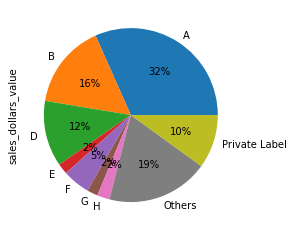

In [39]:
manu_Sales=pd.merge(Sales,Product_Manufacturer, on='PRODUCT_ID', how='inner')
manu_Sales.groupby('Vendor')['sales_dollars_value'].sum().plot(kind='pie',autopct='%.0f%%')
manu_Sales.groupby('Vendor')['sales_dollars_value'].sum()

In [40]:
## OVERALL MARKET SHARE OF OUR CLIENT A is 32 %

## potential competitors for our client in each theme

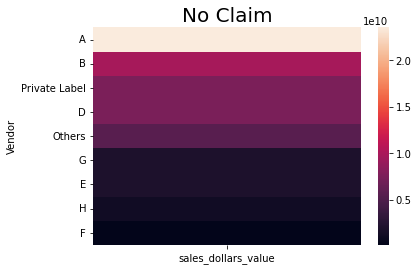

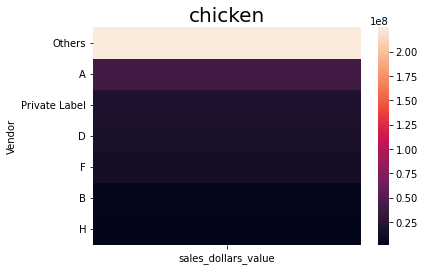

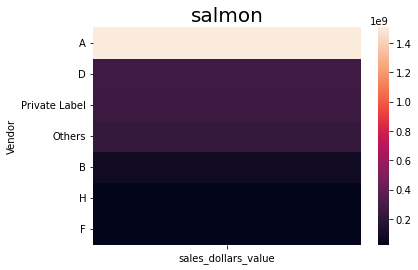

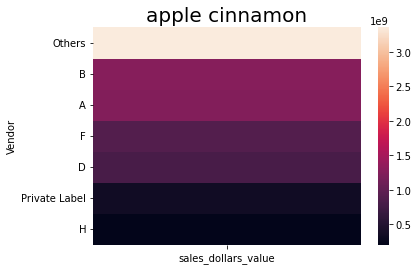

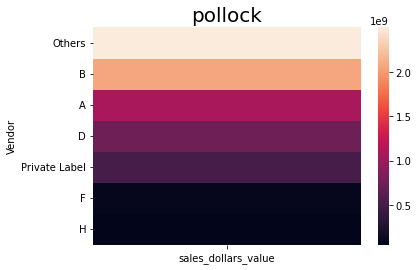

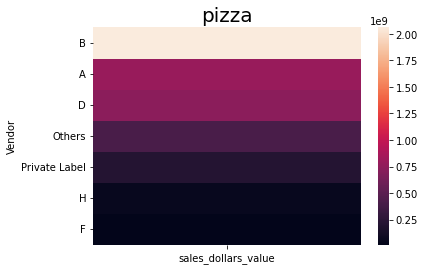

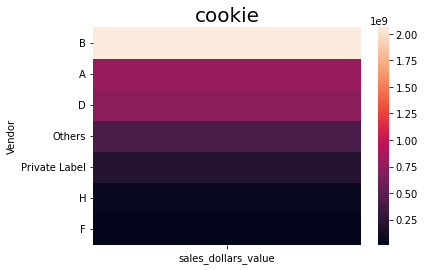

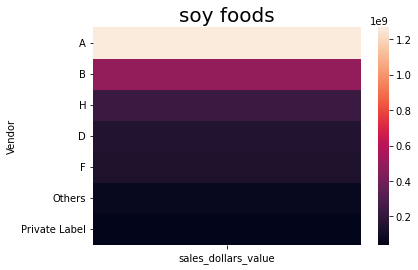

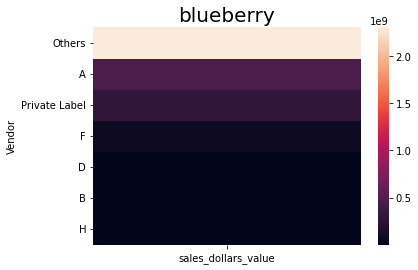

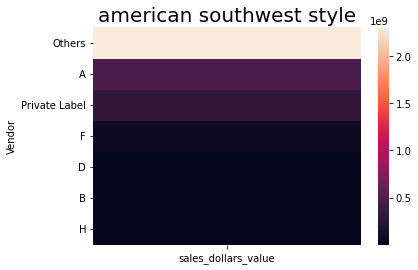

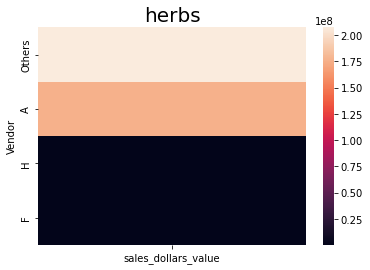

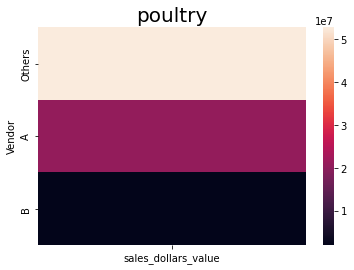

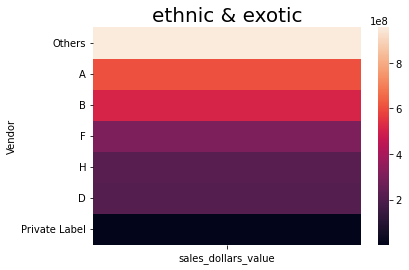

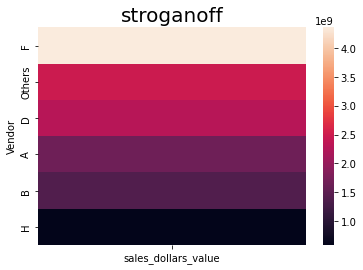

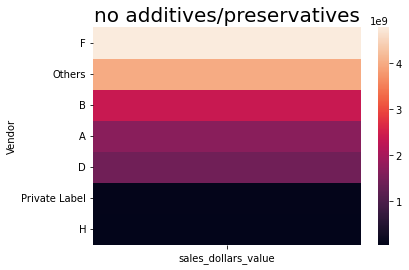

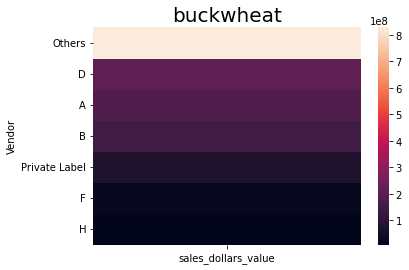

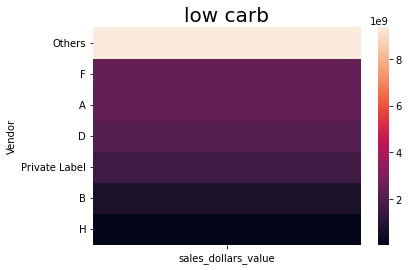

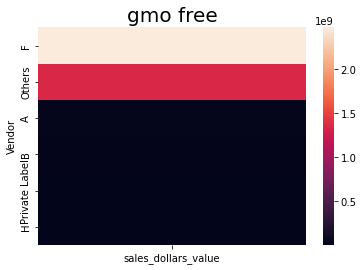

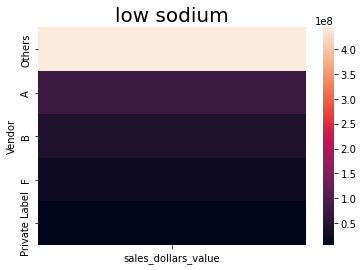

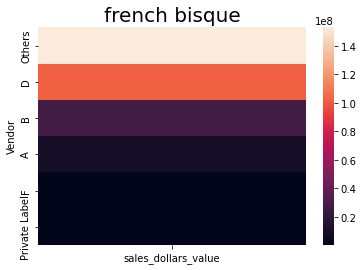

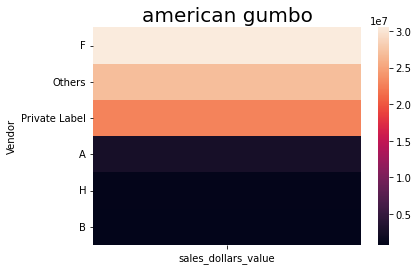

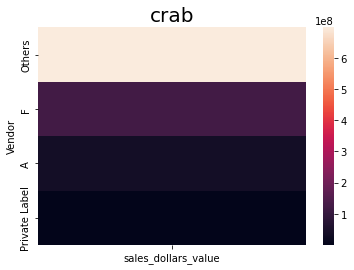

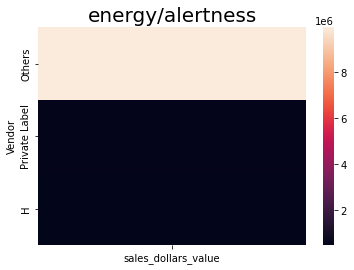

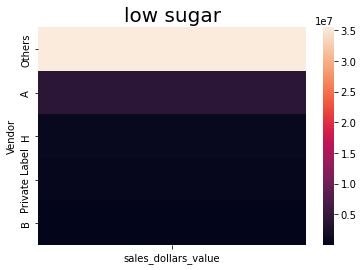

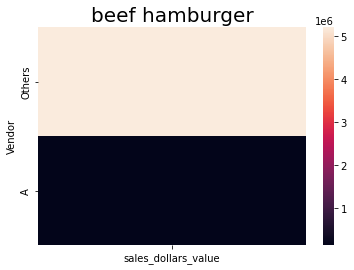

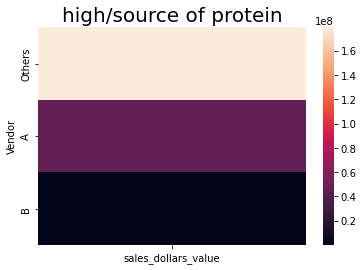

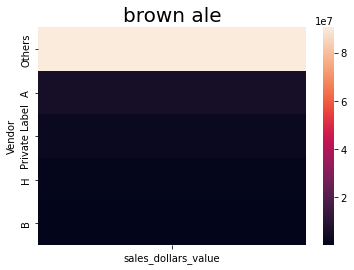

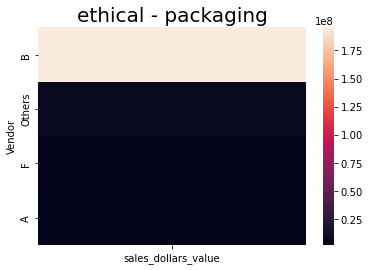

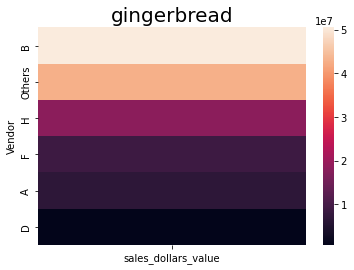

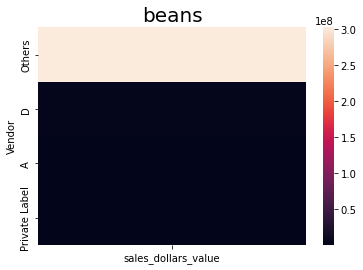

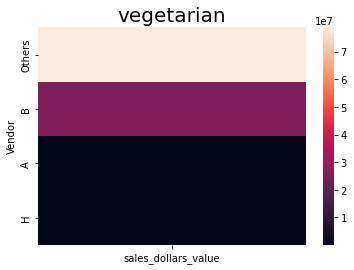

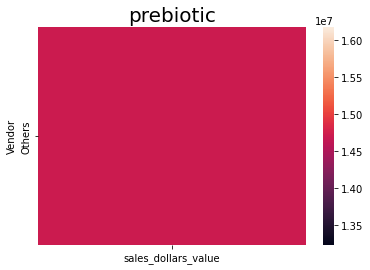

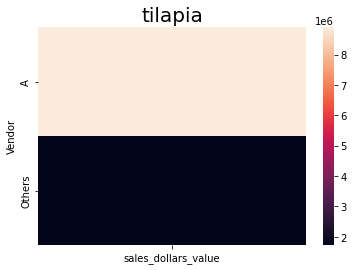

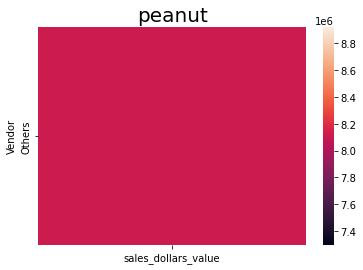

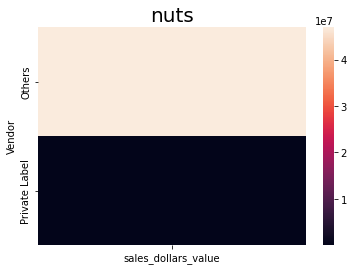

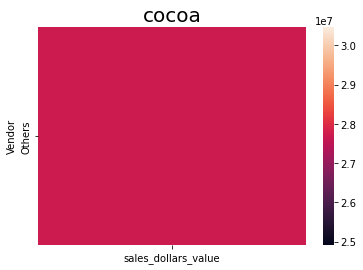

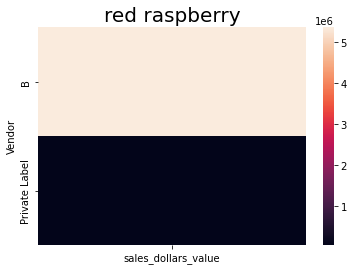

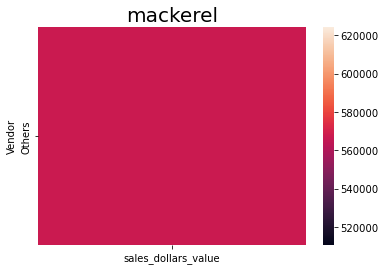

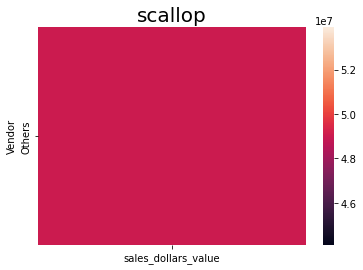

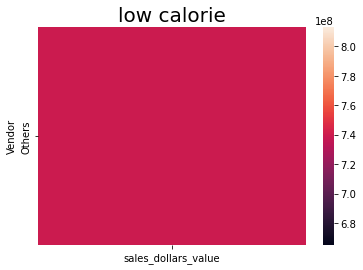

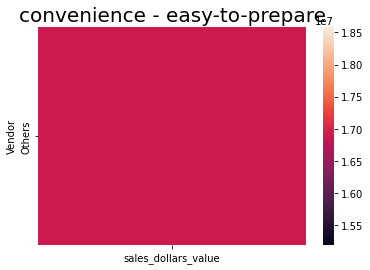

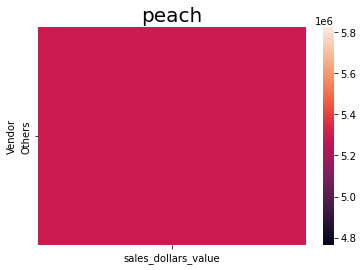

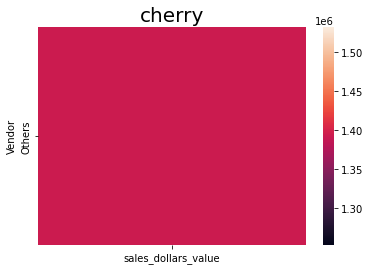

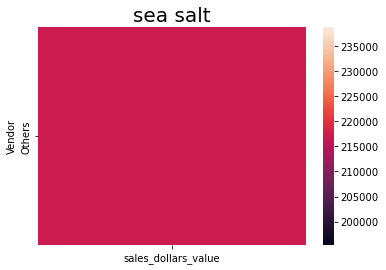

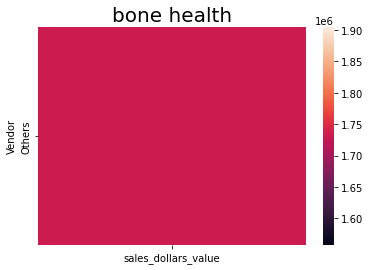

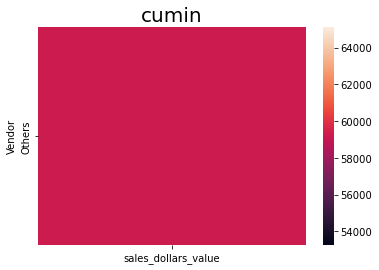

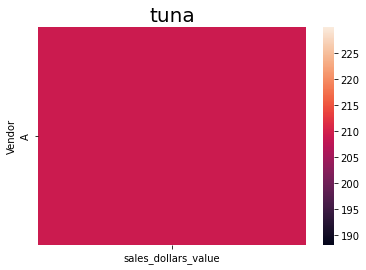

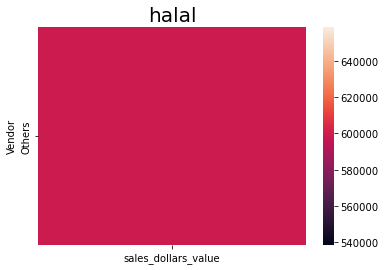

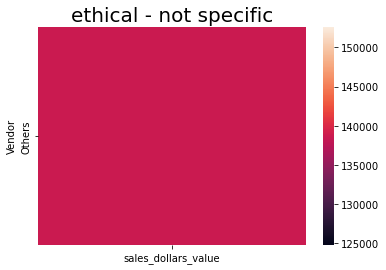

In [41]:
df1= pd.merge(Theme_product_list,Theme,on='CLAIM_ID',how='left')
df2 =pd.merge(manu_Sales,df1,on='PRODUCT_ID',how='left')
l1 = df2['Claim Name'].unique()
temp = list()
for th in l1:
    temp.append(df2[df2['Claim Name'] == th].groupby('Vendor')[['Claim Name','sales_dollars_value']].sum())
    
for i in range(0,len(temp)) :
    ax = plt.subplot()
    ax = sns.heatmap(temp[i].sort_values('sales_dollars_value', ascending = False))
    ax.set_title(l1[i],fontsize = 20)
    plt.show()

In [42]:
social=pd.merge(Social_Media,Theme,on='CLAIM_ID',how='left')
l_themes = social['Claim Name'].unique()
dict = {}

for th in l_themes:
    s1 = social[(social['published_date'].dt.year == 2019) & (social['Claim Name'] == th)]['total_post'].sum()
    s2 = social[(social['published_date'].dt.year == 2018) & (social['Claim Name'] == th)]['total_post'].sum()
    dict[th] = ((s1-s2)/s2)*100
dict
emerging_social = pd.DataFrame(pd.Series(dict).sort_values(ascending = False).head(10) , columns=['%Growth'])
emerging_social = emerging_social.reset_index().rename(columns={'index' : 'Theme Name'})
emerging_social

C:\Users\VISHWA~1.KAR\AppData\Local\Temp/ipykernel_3400/3791866682.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  dict[th] = ((s1-s2)/s2)*100


,Theme Name,%Growth
0,peanut butter,4166.000000
1,venison,310.000000
2,butternut squash,300.000000
3,cranberry,235.211268
4,peanut,191.056911
5,single shot,87.240356
6,pepper,72.727273
7,dill,67.132867
8,red raspberry,60.707269
9,microwaveable,50.962196


In [43]:
##PEANUT BUTTER is the highly emerging theme in Social Media data

In [44]:
google=pd.merge(Google_Search,Theme,on='CLAIM_ID',how='left')
l_themes = google['Claim Name'].unique()
l_themes
dict = {}

for th in l_themes :
    s1 = google[(google['date'].dt.year == 2019) & (google['Claim Name'] == th)]['searchVolume'].sum()
    s2 = google[(google['date'].dt.year == 2018) & (google['Claim Name'] == th)]['searchVolume'].sum()
    dict[th] = ((s1-s2)/s2)*100
dict
emerging_google = pd.DataFrame(pd.Series(dict).sort_values(ascending = False).head(15) , columns=['%Growth'])
emerging_google = emerging_google.reset_index().rename(columns={'index' : 'Theme Name'}).tail(10).reset_index().drop(columns = ['index'])
emerging_google


C:\Users\VISHWA~1.KAR\AppData\Local\Temp/ipykernel_3400/3151736438.py:9: RuntimeWarning: divide by zero encountered in longlong_scalars
  dict[th] = ((s1-s2)/s2)*100


,Theme Name,%Growth
0,convenience - ready prepared,3000.000000
1,poultry,712.495057
2,fruit,550.000000
3,peanut butter,279.657795
4,coconut,279.098361
5,oral health,195.191298
6,natural,113.461582
7,carob,100.000000
8,seeds,98.214286
9,parsley,91.498741


In [45]:
## convenience - ready prepared is the highly emerging theme in Social Media data

In [46]:
Sales_df=pd.merge(Sales,Theme_product_list,on='PRODUCT_ID',how='left')
sales=pd.merge(Sales_df,Theme,on='CLAIM_ID',how='left')
l_themes = sales['Claim Name'].unique()
dict = {}

for th in l_themes :
    s1 = sales[(sales['system_calendar_key_N'].dt.year == 2019) & (sales['Claim Name'] == th)]['sales_dollars_value'].sum()
    s2 = sales[(sales['system_calendar_key_N'].dt.year == 2018) & (sales['Claim Name'] == th)]['sales_dollars_value'].sum()
    dict[th] = ((s1-s2)/s2)*100
dict
emerging_sales = pd.DataFrame(pd.Series(dict).sort_values(ascending = False).head(11) , columns=['%Growth'])
emerging_sales = emerging_sales.reset_index().rename(columns={'index' : 'Theme Name'})
emerging_sales

C:\Users\VISHWA~1.KAR\AppData\Local\Temp/ipykernel_3400/1705668251.py:9: RuntimeWarning: invalid value encountered in double_scalars
  dict[th] = ((s1-s2)/s2)*100


,Theme Name,%Growth
0,halal,415.925206
1,ethical - not specific,120.332640
2,poultry,119.480444
3,vegetarian,41.409170
4,beef hamburger,23.665536
5,low sugar,21.913218
6,beans,11.313036
7,herbs,10.116478
8,convenience - easy-to-prepare,-3.554983
9,high/source of protein,-4.203289


In [47]:
## HALAL is the highly emerging theme in Social Media data

## Validate the hypothesis

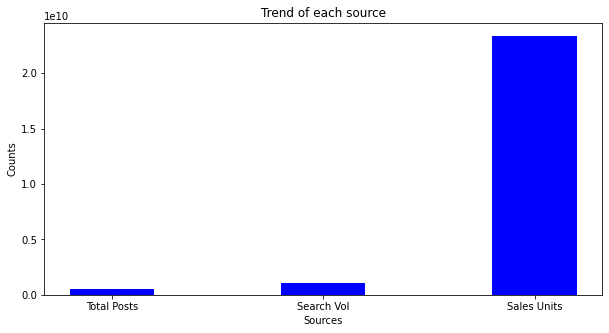

In [48]:
S=Social_Media['total_post'].sum()
G=Google_Search['searchVolume'].sum()
s=Sales['sales_units_value'].sum()
data = {'Total Posts':S ,'Search Vol':G ,'Sales Units':s}
Sources = list(data.keys())
Counts = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(Sources, Counts, color ='blue',
        width = 0.4)
 
plt.xlabel("Sources")
plt.ylabel("Counts")
plt.title("Trend of each source")
plt.show()

C:\Users\VISHWA~1.KAR\AppData\Local\Temp/ipykernel_3400/2530758921.py:17: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


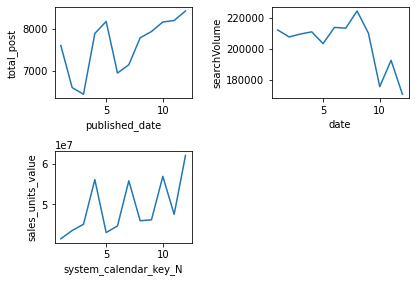

In [49]:
t1 = Social_Media.sort_values(by = ['published_date', 'CLAIM_ID'])
temp1 = pd.DataFrame(t1.groupby(['published_date', 'CLAIM_ID'])['total_post'].sum()).reset_index()
t2 = Google_Search.sort_values(by = ['date', 'CLAIM_ID'])
temp2 = pd.DataFrame(t2.groupby(['date', 'CLAIM_ID'])['searchVolume'].sum()).reset_index()
t3=sales_df1.sort_values(by=['system_calendar_key_N','CLAIM_ID'])
temp3 = pd.DataFrame(t3.groupby(['system_calendar_key_N', 'CLAIM_ID'])['sales_units_value'].sum()).reset_index()

plt.subplot(2, 2, 1) 
temp1 = temp1[temp1['CLAIM_ID'] == 8][['published_date', 'total_post']]
sns.lineplot(x = 'published_date', y = 'total_post' ,data = temp1[(temp1['published_date'].dt.year == 2016)].groupby(temp1['published_date'].dt.month).sum().reset_index())
plt.subplot(2, 2, 2)
temp2 = temp2[temp2['CLAIM_ID'] == 8][['date', 'searchVolume']]
sns.lineplot(x = 'date', y = 'searchVolume' ,data = temp2[(temp2['date'].dt.year == 2016)].groupby(temp2['date'].dt.month).sum().reset_index())
plt.subplot(2, 2, 3)
temp3 = temp3[temp3['CLAIM_ID'] == 8][['system_calendar_key_N', 'sales_units_value']]
sns.lineplot(x = 'system_calendar_key_N', y = 'sales_units_value' ,data = temp3[(temp3['system_calendar_key_N'].dt.year == 2016)].groupby(temp3['system_calendar_key_N'].dt.month).sum().reset_index())
plt.tight_layout(1)
plt.show()

C:\Users\VISHWA~1.KAR\AppData\Local\Temp/ipykernel_3400/2264760398.py:17: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


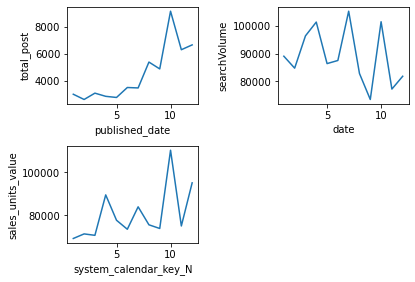

In [50]:
t1 = Social_Media.sort_values(by = ['published_date', 'CLAIM_ID'])
temp1 = pd.DataFrame(t1.groupby(['published_date', 'CLAIM_ID'])['total_post'].sum()).reset_index()
t2 = Google_Search.sort_values(by = ['date', 'CLAIM_ID'])
temp2 = pd.DataFrame(t2.groupby(['date', 'CLAIM_ID'])['searchVolume'].sum()).reset_index()
t3=sales_df1.sort_values(by=['system_calendar_key_N','CLAIM_ID'])
temp3 = pd.DataFrame(t3.groupby(['system_calendar_key_N', 'CLAIM_ID'])['sales_units_value'].sum()).reset_index()

plt.subplot(2, 2, 1) 
temp1 = temp1[temp1['CLAIM_ID'] == 437][['published_date', 'total_post']]
sns.lineplot(x = 'published_date', y = 'total_post' ,data = temp1[(temp1['published_date'].dt.year == 2016)].groupby(temp1['published_date'].dt.month).sum().reset_index())
plt.subplot(2, 2, 2)
temp2 = temp2[temp2['CLAIM_ID'] == 437][['date', 'searchVolume']]
sns.lineplot(x = 'date', y = 'searchVolume' ,data = temp2[(temp2['date'].dt.year == 2016)].groupby(temp2['date'].dt.month).sum().reset_index())
plt.subplot(2, 2, 3)
temp3 = temp3[temp3['CLAIM_ID'] == 437][['system_calendar_key_N', 'sales_units_value']]
sns.lineplot(x = 'system_calendar_key_N', y = 'sales_units_value' ,data = temp3[(temp3['system_calendar_key_N'].dt.year == 2016)].groupby(temp3['system_calendar_key_N'].dt.month).sum().reset_index())
plt.tight_layout(1)
plt.show()

C:\Users\VISHWA~1.KAR\AppData\Local\Temp/ipykernel_3400/2261630675.py:17: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


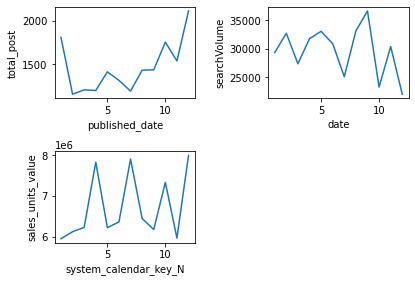

In [51]:
t1 = Social_Media.sort_values(by = ['published_date', 'CLAIM_ID'])
temp1 = pd.DataFrame(t1.groupby(['published_date', 'CLAIM_ID'])['total_post'].sum()).reset_index()
t2 = Google_Search.sort_values(by = ['date', 'CLAIM_ID'])
temp2 = pd.DataFrame(t2.groupby(['date', 'CLAIM_ID'])['searchVolume'].sum()).reset_index()
t3=sales_df1.sort_values(by=['system_calendar_key_N','CLAIM_ID'])
temp3 = pd.DataFrame(t3.groupby(['system_calendar_key_N', 'CLAIM_ID'])['sales_units_value'].sum()).reset_index()

plt.subplot(2, 2, 1) 
temp1 = temp1[temp1['CLAIM_ID'] == 81][['published_date', 'total_post']]
sns.lineplot(x = 'published_date', y = 'total_post' ,data = temp1[(temp1['published_date'].dt.year == 2016)].groupby(temp1['published_date'].dt.month).sum().reset_index())
plt.subplot(2, 2, 2)
temp2 = temp2[temp2['CLAIM_ID'] == 81][['date', 'searchVolume']]
sns.lineplot(x = 'date', y = 'searchVolume' ,data = temp2[(temp2['date'].dt.year == 2016)].groupby(temp2['date'].dt.month).sum().reset_index())
plt.subplot(2, 2, 3)
temp3 = temp3[temp3['CLAIM_ID'] == 81][['system_calendar_key_N', 'sales_units_value']]
sns.lineplot(x = 'system_calendar_key_N', y = 'sales_units_value' ,data = temp3[(temp3['system_calendar_key_N'].dt.year == 2016)].groupby(temp3['system_calendar_key_N'].dt.month).sum().reset_index())
plt.tight_layout(1)
plt.show()

In [52]:
#By the visualization we can clearly tell that the latency is significantly different across the themes and we can recommend the montly analysis

## SALES  MODEL

In [53]:
df1=pd.merge(Sales,Theme_product_list,on='PRODUCT_ID',how='left')
df2=pd.DataFrame(df1.groupby(['CLAIM_ID'],as_index=False)['sales_dollars_value','sales_units_value','sales_lbs_value'].sum())
df3=pd.DataFrame(Social_Media.groupby('CLAIM_ID')['total_post'].sum())
df4=pd.DataFrame(Google_Search.groupby('CLAIM_ID')['searchVolume'].sum())
df5=pd.merge(df2,df3,on='CLAIM_ID',how='left')
df6=pd.merge(df5,df4,on='CLAIM_ID',how='left')
df6['total_post'].fillna(int(df6['total_post'].mean()), inplace=True)
df6['searchVolume'].fillna(int(df6['searchVolume'].mean()), inplace=True)
df6

C:\Users\VISHWA~1.KAR\AppData\Local\Temp/ipykernel_3400/1916538206.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2=pd.DataFrame(df1.groupby(['CLAIM_ID'],as_index=False)['sales_dollars_value','sales_units_value','sales_lbs_value'].sum())


,CLAIM_ID,sales_dollars_value,sales_units_value,sales_lbs_value,total_post,searchVolume
0,0,5.876695e+10,18581171922,5.947549e+10,123389.0,3942058.0
1,8,1.862559e+10,2627344028,6.498410e+09,535903.0,14911004.0
2,15,3.063672e+08,17155662,8.623467e+07,10259.0,3942058.0
3,16,2.768481e+07,12968196,5.633286e+06,123389.0,3942058.0
4,32,1.275780e+10,1391215131,5.473036e+09,123389.0,3942058.0
5,38,5.918100e+04,5732,2.705000e+03,6514.0,3942058.0
6,39,2.256020e+08,13694309,1.064098e+08,7122.0,112339.0
7,40,1.438817e+10,1559966425,5.611049e+09,28035.0,2734.0
8,58,1.465476e+09,307250029,3.647586e+08,123389.0,3942058.0
9,65,1.386720e+05,5686,1.705100e+04,59463.0,813054.0


In [54]:
df6['sales_lbs_value'] = df6['sales_lbs_value'].astype(np.int64)

## MODEL SELECTION

In [55]:
dataset=df6[['CLAIM_ID','total_post','searchVolume','sales_units_value','sales_lbs_value','sales_dollars_value']]

In [56]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [58]:
## Multiple Linear Regression

In [59]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [60]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2.11e+09 3.14e+09]
 [6.25e+09 1.28e+10]
 [3.94e+08 5.42e+06]
 [2.86e+09 1.73e+06]
 [1.67e+08 7.55e+07]
 [1.96e+09 3.14e+09]
 [1.19e+08 5.99e+05]
 [6.92e+08 1.06e+07]
 [5.88e+09 1.44e+10]
 [1.04e+09 9.88e+07]]


In [61]:
r2_score(y_test, y_pred)

0.5412469756303904

In [62]:
## POLYNOMIAL REGRESSION

In [63]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

In [64]:
y_pred = regressor.predict(poly_reg.transform(x_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-2.05e+10  3.14e+09]
 [ 1.84e+13  1.28e+10]
 [ 1.09e+08  5.42e+06]
 [ 1.15e+08  1.73e+06]
 [ 1.15e+08  7.55e+07]
 [ 2.19e+10  3.14e+09]
 [ 1.15e+08  5.99e+05]
 [ 1.07e+08  1.06e+07]
 [ 4.19e+13  1.44e+10]
 [ 3.08e+08  9.88e+07]]


In [65]:
r2_score(y_test, y_pred)

-7570652.031724817

In [66]:
## Decision Tree Regression

In [67]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [68]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[4.25e+09 3.14e+09]
 [7.01e+09 1.28e+10]
 [4.09e+07 5.42e+06]
 [5.67e+05 1.73e+06]
 [8.45e+07 7.55e+07]
 [4.25e+09 3.14e+09]
 [1.39e+06 5.99e+05]
 [4.09e+07 1.06e+07]
 [7.01e+09 1.44e+10]
 [8.45e+07 9.88e+07]]


In [69]:
r2_score(y_test, y_pred)

0.6743481056646037

In [70]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [71]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[3.25e+09 3.14e+09]
 [7.24e+09 1.28e+10]
 [3.98e+07 5.42e+06]
 [1.07e+07 1.73e+06]
 [6.00e+07 7.55e+07]
 [2.92e+09 3.14e+09]
 [5.90e+05 5.99e+05]
 [4.52e+07 1.06e+07]
 [9.56e+09 1.44e+10]
 [7.31e+07 9.88e+07]]


In [72]:
r2_score(y_test, y_pred)

0.8051803586416291

In [73]:
##Decision tree regression tree is giving the great R2 value

## TRAINING OF MODEL

In [74]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x, y)

DecisionTreeRegressor(random_state=0)

In [75]:
regressor.predict([[8,535903,14911004,2627421936,6498709428]])

array([1.86e+10])

## identify the themes with high business opportunity

<AxesSubplot:xlabel='Claim Name'>

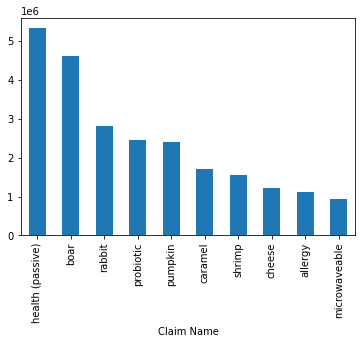

In [76]:
Soc=pd.merge(Social_Media,Theme,on='CLAIM_ID',how='left')
b1=Soc.groupby('Claim Name')['total_post'].sum().sort_values(ascending=False).head(10)
b1.plot(kind='bar')

<AxesSubplot:xlabel='Claim Name'>

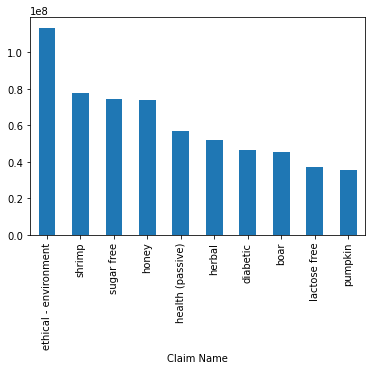

In [77]:
Goog=pd.merge(Google_Search,Theme,on='CLAIM_ID',how='left')
b2=Goog.groupby('Claim Name')['searchVolume'].sum().sort_values(ascending=False).head(10)
b2.plot(kind='bar')

In [78]:
##  health passive,pumpkin

## controllable factors which client could leverage to increase sales across themes?

In [79]:
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(x_train,y_train)
mutual_info

array([0.06, 0.1 , 0.08, 0.75, 1.13])

In [80]:
mutual_info=pd.Series(mutual_info)
mutual_info.sort_values(ascending=False)

4    1.129431
3    0.750254
1    0.104893
2    0.075188
0    0.064245
dtype: float64

<AxesSubplot:>

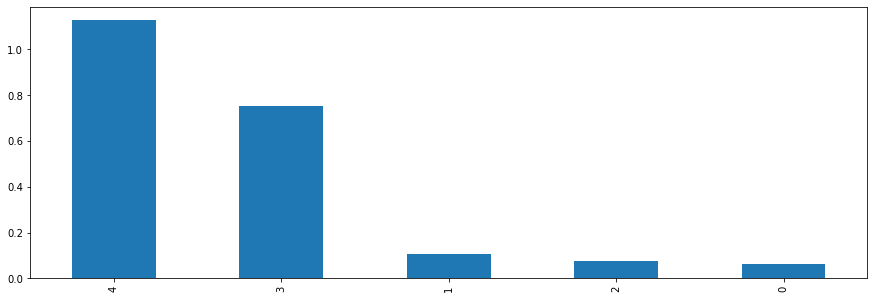

In [81]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [82]:
## sales lbs value, total post are the controllable factors and can increase 5% of sales